In [34]:
import os
import numpy as np
import matplotlib.pyplot as plt

# se espera que el archivo esté en formato .txt (llamado "data.txt") y que esté en la carpeta "data"
data_path = os.path.join('data', 'data.txt')

In [35]:
# diccionario con metadatos
metadata = {}
energy = [] # (keV)
counts = []
background = []
fit = []

with open(data_path, 'r') as file:

    # se obtiene la metadata
    for _ in range(50):  # Solo las primeras 50 líneas que tienen la metadata
        line = file.readline()
        # se divide la línea por ':'
        key, value = [item.strip() for item in line.split(':', 1)]

        if key not in metadata:
            metadata[key] = value
        else: # por si hay dos valores con el mismo nombre
            key = key + '_1'
            metadata[key] = value

    # se ignora la línea de encabezados
    ignore_line = file.readline()  

    # hacer loop hasta llegar al final del archivo obteniendo los datos
    while True:
        line = file.readline()
        if not line:
            break
        # se divide la línea por espacios en blanco y se remueven las comas para convertir a float
        e, c, b, f = [float(item.replace(',','.')) for item in line.split()]
        energy.append(e)
        counts.append(c)
        background.append(b)
        fit.append(f)

# se convierten las listas a arrays de numpy
energy = np.array(energy)
counts = np.array(counts)
background = np.array(background)
fit = np.array(fit)

In [36]:
assert len(energy) == len(counts) == len(background) == len(fit) == (4147-52+1)
assert len(metadata) == 50

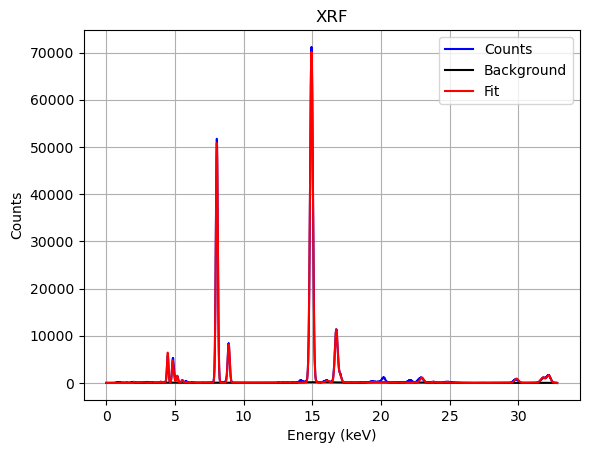

In [37]:
# graficar datos

plt.plot(energy, counts, label='Counts', color='b')
plt.plot(energy, background, label='Background', color='k')
plt.plot(energy, fit, label='Fit', color = 'r')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.title('XRF')
plt.grid()
plt.legend()
plt.show()

In [38]:
# maximo de background

max_background = max(background)
print(f'El máximo de background es {max_background}')

El máximo de background es 147.8232


In [40]:
from scipy.signal import find_peaks

# Para detectar los picos, se puede usar la función find_peaks de scipy.signal

# Encuentra los picos
peaks, properties = find_peaks(fit, height=3000)  # también se puede probar parámetros prominence y width

print("Cantidad de picos:", len(peaks))

print("Índices de los picos:", peaks)

peak_heights = fit[peaks]
print("Alturas de los picos:", peak_heights)


Cantidad de picos: 6
Índices de los picos: [ 559  605 1005 1113 1864 2090]
Alturas de los picos: [ 6422.529  4761.777 50833.13   8212.209 70152.51  11318.77 ]
